In [0]:
import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam 

from keras.applications.mobilenet import preprocess_input
# from keras.applications.inception_v3 import preprocess_input
from keras.applications import MobileNet
# from keras.applications import InceptionV3

from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam
from keras.layers.core import Dense, Activation
from keras import backend as K
from PIL import ImageFile
from datetime import datetime
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/Flickr_Animals_Classification.tar.gz /content
!tar xzf Flickr_Animals_Classification.tar.gz
!rm Flickr_Animals_Classification.tar.gz
!rm /content/Flickr_Animals_Classification/train/Lynx/8166974841_1a12ed7337_o.jpg

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.3)(x)
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dropout(0.3)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(16,activation='softmax')(x) #final layer with softmax activation
model = Model(inputs=base_model.input, output=preds)
input_shape = (224, 224)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [14]:
from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
# we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024, activation='relu')(x)
# x=Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)  # dense layer 2
# x=Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)  # dense layer 3
# x=Dropout(0.3)(x)
# final layer with softmax activation
preds = Dense(16, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
for layer in model.layers[:-4]: # ligt gutes ergebnis hieran??
    layer.trainable = False

In [16]:
dataset_dir = '/content/Flickr_Animals_Classification/'

datagen_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.9,1.1],
    horizontal_flip=True)

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)



train_generator = datagen.flow_from_directory(dataset_dir + 'train',
                                                    target_size=input_shape,
                                                    color_mode='rgb',
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen.flow_from_directory(dataset_dir + 'validation',
                                                         target_size=input_shape,
                                                         color_mode='rgb',
                                                         batch_size=64,
                                                         class_mode='categorical')

test_generator = datagen.flow_from_directory(dataset_dir + 'test',
                                                   target_size=input_shape,
                                                   color_mode='rgb',
                                                   batch_size=64,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 4080 images belonging to 16 classes.
Found 503 images belonging to 16 classes.
Found 522 images belonging to 16 classes.


In [0]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
step_size_train = train_generator.n//train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size

In [0]:
%load_ext tensorboard
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
%tensorboard --logdir logs/scalars/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=step_size_train,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=validation_steps,
                              #callbacks=[tensorboard_callback],
                              verbose=1)

Epoch 1/15


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1216 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 162 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1424 byte

 9/63 [===>..........................] - ETA: 11:13 - loss: 1.6541 - acc: 0.5486

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4718592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


32/63 [==============>...............] - ETA: 4:45 - loss: 0.7971 - acc: 0.7749

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


53/63 [========================>.....] - ETA: 1:28 - loss: 0.5764 - acc: 0.8359

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 100140552 bytes but only got 0. Skipping tag 768
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2284257280 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2449997824 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2450128896 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Ex

63/63 [==============================] - 546s 9s/step - loss: 0.5208 - acc: 0.8503 - val_loss: 0.3763 - val_acc: 0.8787
Epoch 2/15
63/63 [==============================] - 537s 9s/step - loss: 0.1263 - acc: 0.9576 - val_loss: 0.2711 - val_acc: 0.9245
Epoch 3/15
63/63 [==============================] - 543s 9s/step - loss: 0.1021 - acc: 0.9667 - val_loss: 0.2202 - val_acc: 0.9264
Epoch 4/15
63/63 [==============================] - 540s 9s/step - loss: 0.0931 - acc: 0.9675 - val_loss: 0.2458 - val_acc: 0.9225
Epoch 5/15
63/63 [==============================] - 538s 9s/step - loss: 0.0683 - acc: 0.9787 - val_loss: 0.3492 - val_acc: 0.9205
Epoch 6/15
63/63 [==============================] - 532s 8s/step - loss: 0.0535 - acc: 0.9831 - val_loss: 0.2897 - val_acc: 0.9384
Epoch 7/15
63/63 [==============================] - 536s 9s/step - loss: 0.0517 - acc: 0.9849 - val_loss: 0.3958 - val_acc: 0.9066
Epoch 8/15
63/63 [==============================] - 534s 8s/step - loss: 0.0730 - acc: 0.9786 

In [0]:
output_dir = '/content/drive/My\ Drive/'
# model.save(output_dir + 'flickr_animals_mobile_net_v2.h5')
# model.save_weights(output_dir + 'flickr_animals_mobile_net_v2_weights.h5')

model.save('flickr_animals_mobile_net_v2.h5')
# model.save_weights('flickr_animals_mobile_net_v2_weights.h5')


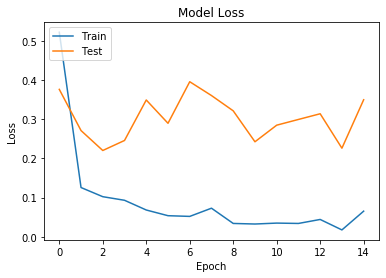

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [0]:
model.evaluate(test_generator)